In [1]:
# BLOC INICIAL.
# Modifiqueu-ne els paràmetres per a obtenir les solucions de l'àtom d'hidrogen per al vostres nombres quàntics l arbitrari.

# Definiu nombre quàntic l
l = 3

# Interval d'Eigenvalues que voleu trobar. (Com a configuració predeterminada, s'obtenen els quatre primers eigenvalues)
n1 = 1
n2 = 4


# Paràmetres constants. No els modifiqueu.
from scipy import constants as cs
# Massa reduïda
mr = cs.m_e*cs.m_p/(cs.m_p + cs.m_e)
    
# Radi de Bohr
a0 = 5.29e-11



In [2]:
# Bloc on s'obtenen els quatre primers valors propis de l'energia pel cas del potencial de Coulomb, per a l'àtom d'hidrogen.
# L'obtenció del vaps es duu a terme fent ús del mètode tridiagonal.

import numpy as np
from scipy import constants as cs
import sturm
import tridiagonal

# Define constants 
rmax = 1e-8
Ninter = 10000


# Paràmetres i definicions per a fer servir la tridiagonal. 
h = rmax/Ninter
n = Ninter - 1
v = np.zeros(n)

# El potencial és ara el potencial de Coulomb.
for k in range (1,n+1):
    v[k-1] = -(2*mr*(cs.e)**2)/(4*cs.pi*cs.epsilon_0*k*h*(cs.hbar)**2) + l*(l+1)/(k*h)**2
    
vaps = tridiagonal.tridiagonal(v,h,n,n1,n2)


print(vaps*(cs.hbar)**2/(2*mr*cs.e))
    



[-0.84989308 -0.54393167 -0.37773038 -0.27751621]


[-0.84977476 -0.52474125 -0.20654248  0.23403365]


<Figure size 432x288 with 0 Axes>

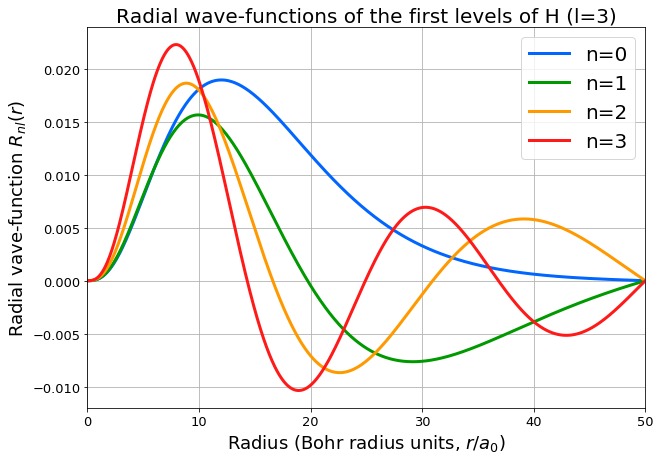

<Figure size 432x288 with 0 Axes>

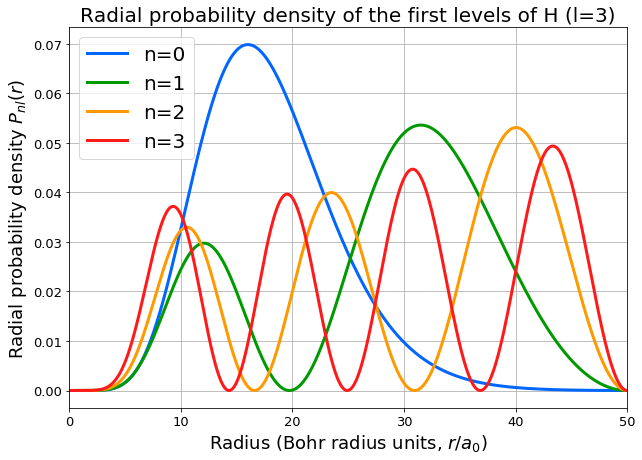

<Figure size 432x288 with 0 Axes>

In [3]:
# Bloc on s'obtenen les funcions d'ona radials pel cas del potencial de Coulomb, per a l'àtom d'hidrogen.
# L'obtenció de la wavefunction es duu a terme fent ús del mètode d'integració.
# Tot el desenvolupament s'ha dut a terme en radis de Bohr.
# Finalment també s'hi representen les diferents densitats de probabilitat en funció del radi.

%matplotlib inline

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import constants as cs
import wavefunction
import sturm
import tridiagonal
from matplotlib import interactive
interactive(True)

# Define constants 
rmin = 0
rmax = 50.0
Ninter = 1000
h = (rmax - rmin)/Ninter
n = Ninter - 1
hbar = cs.hbar/(a0**2)
eps = cs.epsilon_0*(a0**3)

# Definim el potencial de Coloumb.
v = np.zeros(n)

for k in range (1,n+1):
    v[k-1] = -(2*mr*(cs.e)**2/(4*cs.pi*eps*k*h*(hbar)**2)) + l*(l+1)/(k*h)**2
    
vp = tridiagonal.tridiagonal(v,h,n,n1,n2)
valp = vp*(hbar)**2/(2*mr*cs.e)
print(valp*a0**2)


#Càlcul de la Wavefunction numèricament.
#Redefinim intervals
d = v
x = np.zeros(n)
wfnt = np.zeros((n2,n))

#Redefinim el potencial harmonic V(x**2) i x abscisses
for i in range(1,n+1):
    x[i-1] = rmin + h*i
for i in range(1,n2+1):
    wfnt[i-1,:] = wavefunction.wavefunction(d,h,n,vp[i-1])

    
#Grafics de la component radial de la wavefunction.
plt.figure(figsize=(10,7))
plt.plot(x, wfnt[0,:]/x, 'r-', linewidth=3.0, color='#0066ff', label='n=0')
plt.plot(x, wfnt[1,:]/x, 'r-', linewidth=3.0, color='#009900', label='n=1')
plt.plot(x, wfnt[2,:]/x, 'r-', linewidth=3.0, color='#ff9900', label='n=2')
plt.plot(x, wfnt[3,:]/x, 'r-', linewidth=3.0, color='#ff1a1a', label='n=3')
plt.grid()
plt.xlim(rmin, rmax)
plt.title('Radial wave-functions of the first levels of H (l=%i)'%l, fontsize=20)
plt.xlabel('Radius (Bohr radius units, $r/a_{0}$)', fontsize=18)
plt.ylabel('Radial vave-function $R_{nl}(r)$', fontsize=18)
plt.legend(prop={'size': 20})
plt.tick_params(labelsize=13)
plt.figure("""first figure""")


#Grafics de la densitat de probabilitat en funció del radi.
plt.figure(figsize=(10,7))
plt.plot(x, (wfnt[0,:])**2, 'r-', linewidth=3, color='#0066ff', label='n=0')
plt.plot(x, (wfnt[1,:])**2, 'r-', linewidth=3, color='#009900', label='n=1')
plt.plot(x, (wfnt[2,:])**2, 'r-', linewidth=3, color='#ff9900', label='n=2')
plt.plot(x, (wfnt[3,:])**2, 'r-', linewidth=3, color='#ff1a1a', label='n=3')
plt.grid()
plt.xlim(rmin, rmax)
plt.title('Radial probability density of the first levels of H (l=%i)'%l, fontsize=20)
plt.xlabel('Radius (Bohr radius units, $r/a_{0}$)', fontsize=18)
plt.ylabel('Radial probability density $P_{nl}(r)$', fontsize=18)
plt.legend(prop={'size': 20})
plt.tick_params(labelsize=13)
plt.figure("""seocnd figure""")



  


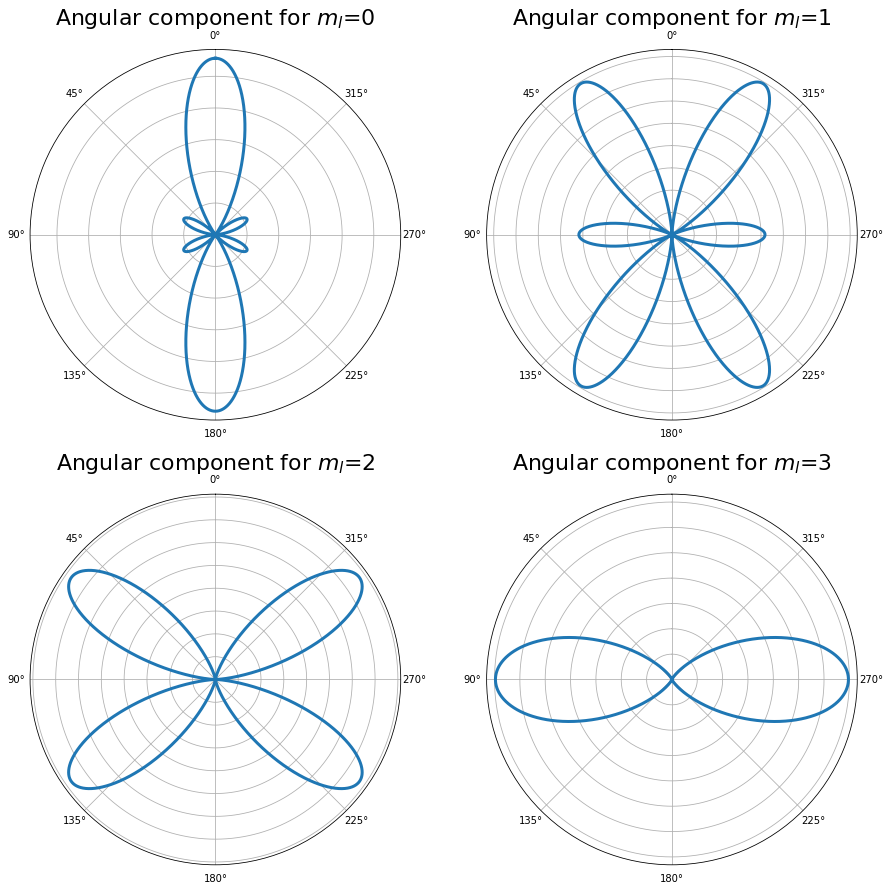

In [4]:
# Bloc on s'obtèn la component angular de la wavefunction en funció del nombre quàntic l.


import numpy as np
from math import *
import matplotlib
import matplotlib.pyplot as plt
from scipy import constants as cs
import vapsRichardson
import wavefunction
import sturm
import tridiagonal
from scipy import special as sp

#Definim els paràmetres
s = 100000

if (l==1) or (l==0):
    theta = np.zeros(s)
    wfan = np.zeros((l+1,s))

    f, axarr = plt.subplots(2, 2, subplot_kw=dict(projection='polar'), figsize=(13,13))

    s = 100000 #parameter for the angles range

    for n in range(1,l+2):      
        for x in range(1,s+1):
            m = n-1
            y = 360/s *x
            ang = radians(y)
            theta[x-1] = ang
            sq = sqrt((2*l+1)*factorial(l-m)/(4*cs.pi*factorial(m+l)))
            wfan[m,x-1] = (((-1)**m)*sqrt((2*l+1)*factorial(l-m)/(4*cs.pi*factorial(m+l)))*sp.lpmv(m,l,cos(ang)))**2

        # Draw the polar diagram for each ml
        axarr[0, n-1].plot(theta, wfan[m,:], linewidth=3)
        axarr[0, n-1].set_theta_zero_location("N")
        axarr[0, n-1].set_yticklabels([])
        axarr[0, n-1].set_title('Angular component for $m_{l}$=%i'%m, fontsize = 22)

    # if l==0 make the second column invisible
    if (l==0):
        axarr[0,1].grid(False)
        axarr[0,1].set_xticks([])
        axarr[0,1].set_yticks([])
        axarr[0,1].set_axis_off()
            
    # make the second row invisible          
    axarr[1,0].grid(False)
    axarr[1,0].set_xticks([])
    axarr[1,0].set_yticks([])
    axarr[1,0].set_axis_off()
        
    axarr[1,1].grid(False)
    axarr[1,1].set_xticks([])
    axarr[1,1].set_yticks([])
    axarr[1,1].set_axis_off()

    
    
elif (l<0):
    print('Not a valid l quantum number')
    
    
else:
    theta = np.zeros(s)
    wfan = np.zeros((l+1,s))

    f, axarr = plt.subplots(2, ceil((l+1)/2), subplot_kw=dict(projection='polar'), figsize=(15,15))

    if (((l+1)/2) != ceil((l+1)/2)):
        axarr[1,ceil((l+1)/2)-1].grid(False)
        axarr[1,ceil((l+1)/2)-1].set_xticks([])
        axarr[1,ceil((l+1)/2)-1].set_yticks([])
        axarr[1,ceil((l+1)/2)-1].set_axis_off()

    s = 100000 #parameter for the angles range

    for n in range(1,l+2):      
        for x in range(1,s+1):
            m = n-1
            y = 360/s *x
            ang = radians(y)
            theta[x-1] = ang
            sq = sqrt((2*l+1)*factorial(l-m)/(4*cs.pi*factorial(m+l)))
            wfan[m,x-1] = (((-1)**m)*sqrt((2*l+1)*factorial(l-m)/(4*cs.pi*factorial(m+l)))*sp.lpmv(m,l,cos(ang)))**2

        if (m < ceil((l+1)/2)):
            axarr[0, m].plot(theta, wfan[m,:], linewidth=3,)
            axarr[0, m].set_theta_zero_location("N")
            axarr[0, m].set_yticklabels([])
            axarr[0, m].set_title('Angular component for $m_{l}$=%i'%m,fontsize = 22)

        else:
            axarr[1, m - ceil((l+1)/2)].plot(theta, wfan[m,:], linewidth=3,)
            axarr[1, m - ceil((l+1)/2)].set_theta_zero_location("N")
            axarr[1, m - ceil((l+1)/2)].set_yticklabels([])
            axarr[1, m - ceil((l+1)/2)].set_title('Angular component for $m_{l}$=%i'%m, fontsize = 22)

            







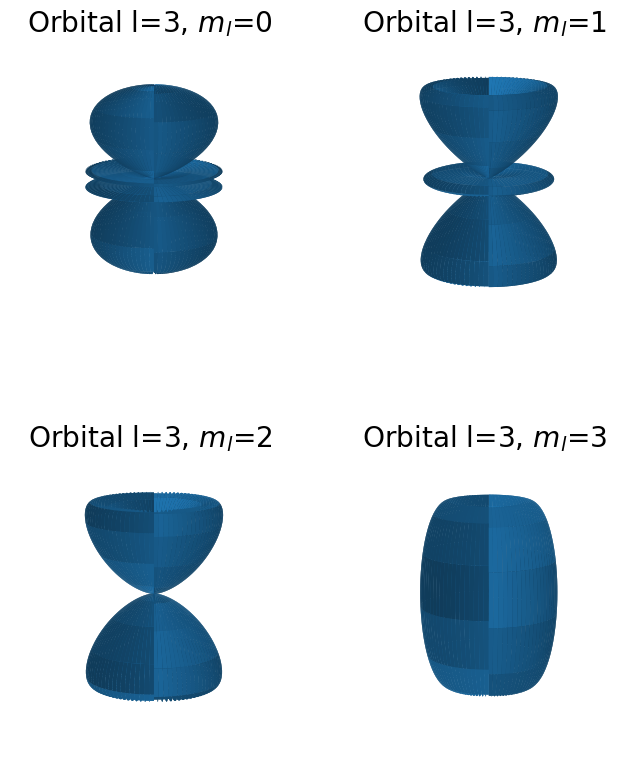

In [5]:
# Aquest bloc ens permet d'obtenir els orbitals en funció del nombre quàntic l. 
# No hi apareix cap informació sobre la probabilitat en funció del radi. 


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import numpy as np
from math import *
from matplotlib import cm
from scipy import special as sp
from scipy import constants as cs


if (l==1) or (l==0):
    f, axarr = plt.subplots(2,2, subplot_kw=dict(projection='3d'), figsize=(10,12))
    
    for n in range(1,l+2):      
        m = n-1

        theta, phi = np.linspace(0, 2 * np.pi, 360), np.linspace(0, np.pi, 360)
        THETA, PHI = np.meshgrid(theta, phi)
        R = (((-1)**m)*np.sqrt((2*l+1)*factorial(l-m)/(4*cs.pi*factorial(m+l)))*sp.lpmv(m,l,np.cos(THETA)))**2

        X = R * np.sin(THETA) * np.cos(PHI)
        Y = R * np.sin(THETA) * np.sin(PHI)
        Z = R * np.cos(THETA)

        #Plot orbital
        axarr[0,m].plot_surface(X, Y, Z, linewidth = 0)

        #Set title
        axarr[0,m].set_title('Orbital l=%i, $m_{l}$=%i'%(l,m), fontsize=28)

        # Hide grid lines
        axarr[0,m].grid(False)

        # Hide axes ticks
        axarr[0,m].set_xticks([])
        axarr[0,m].set_yticks([])
        axarr[0,m].set_zticks([])
        axarr[0,m].set_axis_off()

        #Rotate view angle
        axarr[0,m].view_init(330, 360)
    
    if (l==0):
        # Hide second plot
        axarr[0,1].grid(False)
        axarr[0,1].set_xticks([])
        axarr[0,1].set_yticks([])
        axarr[0,1].set_zticks([])
        axarr[0,1].set_axis_off()

    #Hide second row
    axarr[1,0].grid(False)
    axarr[1,0].set_xticks([])
    axarr[1,0].set_yticks([])
    axarr[1,0].set_zticks([])
    axarr[1,0].set_axis_off()
        
    axarr[1,1].grid(False)
    axarr[1,1].set_xticks([])
    axarr[1,1].set_yticks([])
    axarr[1,1].set_zticks([])
    axarr[1,1].set_axis_off()

    
else:    
    f, axarr = plt.subplots(2,ceil((l+1)/2), subplot_kw=dict(projection='3d'), figsize=(11,14))

    if (((l+1)/2) != ceil((l+1)/2)):   #Hide the last plot if it can be neglected
        axarr[1,ceil((l+1)/2)-1].grid(False)
        axarr[1,ceil((l+1)/2)-1].set_xticks([])
        axarr[1,ceil((l+1)/2)-1].set_yticks([])
        axarr[1,ceil((l+1)/2)-1].set_zticks([])
        axarr[1,ceil((l+1)/2)-1].set_axis_off()


    for n in range(1,l+2):      
        m = n-1

        theta, phi = np.linspace(0, 2 * np.pi, 360), np.linspace(0, np.pi, 360)
        THETA, PHI = np.meshgrid(theta, phi)
        R = (((-1)**m)*np.sqrt((2*l+1)*factorial(l-m)/(4*cs.pi*factorial(m+l)))*sp.lpmv(m,l,np.cos(THETA)))**2

        X = R * np.sin(THETA) * np.cos(PHI)
        Y = R * np.sin(THETA) * np.sin(PHI)
        Z = R * np.cos(THETA)

        if (m < ceil((l+1)/2)):
            #Plot orbital
            axarr[0,m].plot_surface(X, Y, Z, linewidth = 0)

            #Set title
            axarr[0,m].set_title('Orbital l=%i, $m_{l}$=%i'%(l,m), fontsize=28)

            # Hide grid lines
            axarr[0,m].grid(False)

            # Hide axes ticks
            axarr[0,m].set_xticks([])
            axarr[0,m].set_yticks([])
            axarr[0,m].set_zticks([])
            axarr[0,m].set_axis_off()

            #Rotate view angle
            axarr[0,m].view_init(350, 360)

        else:
            axarr[1,m - ceil((l+1)/2)].plot_surface(X, Y, Z, linewidth = 0)

            #Set title
            axarr[1,m - ceil((l+1)/2)].set_title('Orbital l=%i, $m_{l}$=%i'%(l,m), fontsize=28)

            # Hide grid lines
            axarr[1,m - ceil((l+1)/2)].grid(False)

            # Hide axes ticks
            axarr[1,m - ceil((l+1)/2)].set_xticks([])
            axarr[1,m - ceil((l+1)/2)].set_yticks([])
            axarr[1,m - ceil((l+1)/2)].set_zticks([])
            axarr[1,m - ceil((l+1)/2)].set_axis_off()

            #Rotate view angle
            axarr[1,m - ceil((l+1)/2)].view_init(350, 360)

